# EE 511 - Homework 02

### Submitted by: Sajjad Uddin Mahmud

<br>
<span style="color:#C3260C">
Assuming the following waveform 

$ \begin{cases}
    5 sin(\omega t + \pi /6) \; \; t < 0.1\\    
    10 sin(\omega t + \pi /6) \; \; t \geq 0.1
    \end{cases}
$

Given that, $f=60$ Hz, and sampling frequency is 12 samples per cycle.
<span>

In [1]:
## IMPORT PACKAGES
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [2]:
## PARAMETER INPUT
f = 60.0           # frequency in Hz
T = 1/f            # period in seconds
N = 12             # samples per cycle
dT = T/N           # delta T
A1 = 5.0           # amplitude of first signal
A2 = 10.0          # amplitude of second signal
A3 = 3.0           # amplitude of second harmonic
w = 2 * np.pi * f  # omega
start_time = 0
end_time = 0.2

**Plotting the input signal (no harmonics):**

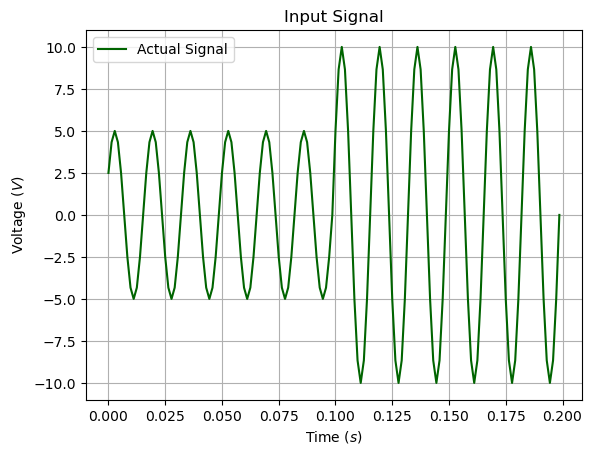

In [3]:
## PLOTTING INPUT SIGNAL
time = np.arange(start_time,end_time,dT)
voltage1 = []

for t in range(0,len(time)):
    
    if time[t] < 0.1:
        v = A1 * np.sin(w * time[t] + np.pi/6) # first signal
    else:
        v = A2 * np.sin(w * time[t] + np.pi/6) # second signal
        
    voltage1.append(v)
    
voltage1 = np.array(voltage1)
    
plt.plot(time,voltage1,mcolors.CSS4_COLORS['darkgreen'])
plt.title("Input Signal")
plt.xlabel("Time $(s)$")
plt.ylabel("Voltage $(V)$")
plt.legend(["Actual Signal"])
plt.grid()
plt.show()


<span style="color:#C3260C">
a) Estimate the amplitude of the signal using full-cycle Fourier algorithm 
</span>

**Fourier algorithm function:**

In [4]:
# FOURIER ALGORITHM

def FourierAlgorithm(signal, frequency, sample):
    
    y = signal
    n = y.size  
    amplitude = []
    angle = []
    
    f = frequency
    N = sample
    dT = 1/(f*N)
    
    t = np.arange(start_time,end_time,dT)
    time = t[N - 1:n]
    
    # WEIGHT VECTOR
    w1 = np.cos(np.arange(0, N) * 2 * np.pi / N)
    w2 = np.sin(np.arange(0, N) * 2 * np.pi / N)
    
    i = N
    while i <= n:
        a1 = 2 * (sum(y[i - N:i] * w1)) / N
        b1 = 2 * (sum(y[i - N:i] * w2)) / N
        
        amplitude = np.append(amplitude, np.sqrt(a1 ** 2 + b1 ** 2))
        angle = np.append(angle, np.degrees(np.arctan(b1 / a1)))
        
        i = i + 1
        
    return amplitude, angle, time
    

**Applying Fourier algorithm on input signal:**

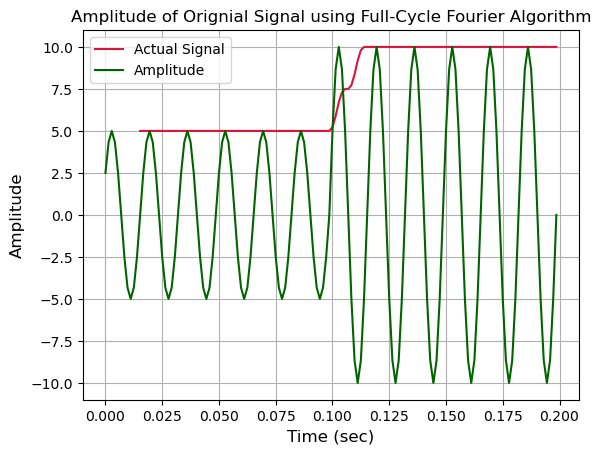

In [5]:
amplitude_fourier1 , angle_fourier1, time_fourier1 = FourierAlgorithm(voltage1,f,N) 

# Plotting
plt.plot(time_fourier1, amplitude_fourier1, mcolors.CSS4_COLORS['crimson'])
plt.plot(time, voltage1, mcolors.CSS4_COLORS['darkgreen'])
plt.xlabel('Time (sec)', fontsize=12) 
plt.ylabel('Amplitude', fontsize=12)
plt.legend(["Actual Signal", "Amplitude"])
plt.title("Amplitude of Orignial Signal using Full-Cycle Fourier Algorithm",fontsize=12)
plt.grid()
plt.show()

<span style="color:#C3260C">
b) Estimate the amplitude of the signal using Least Square algorithm
</span>

**Least Square algorithm function:**

In [6]:
# LEAST SQUARE ALGORITHM

def LeastSquareAlgorithm(signal, frequency, sample):
    
    y = signal  
    amplitude = np.zeros_like(y)
    angle = np.zeros_like(y)
    
    f = frequency
    N = sample
    dT = 1/(f*N)
    w0 = 2 * np.pi * f
    
    A = np.zeros((N, 4))    
    t = np.arange(0,0.2,dT)
    
    # CALCULATING A MATRIX
    for j in range(1, N+1):
        MF = j - (N + 1) / 2  # Multiplying factor
        A[j - 1, :] = [np.sin(w0 * dT * MF), np.cos(w0 * dT * MF), np.sin(2 * w0 * dT * MF), np.cos(2 * w0 * dT * MF)]
        
    # CALCULATING PHASOR
    for i in range(N, len(y)):
        B = y[i - N + 1:i + 1]
        X = np.linalg.lstsq(A, B, rcond=None)[0]
        amplitude[i] = np.sqrt(X[0] ** 2 + X[1] ** 2)
        angle[i] = np.arctan2(X[1], X[0])
        
    return amplitude, angle, t 
    

**Applying Least Square algorithm on the input signal:**

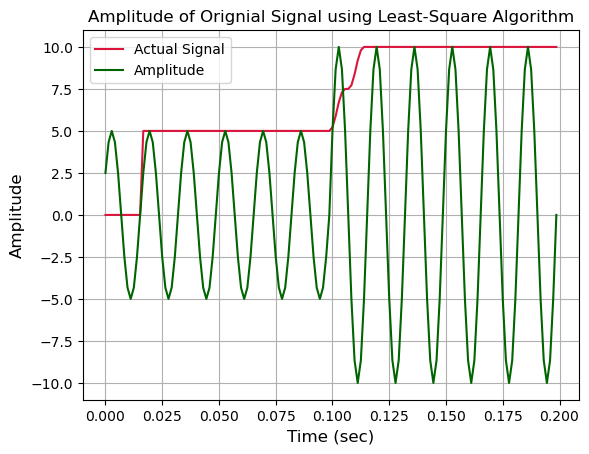

In [7]:
amplitude_leastsquare1 , angle_leastsquare1, time_leastsquare1 = LeastSquareAlgorithm(voltage1,f,N) 

# Plotting
plt.plot(time_leastsquare1, amplitude_leastsquare1, mcolors.CSS4_COLORS['crimson'])
plt.plot(time, voltage1, mcolors.CSS4_COLORS['darkgreen'])
plt.xlabel('Time (sec)', fontsize=12) 
plt.ylabel('Amplitude', fontsize=12)
plt.legend(["Actual Signal", "Amplitude"])
plt.title("Amplitude of Orignial Signal using Least-Square Algorithm",fontsize=12)
plt.grid()
plt.show()

<span style="color:#C3260C">
c) Add second harmonic to the signal and repeat a and b (in this case Least Square algorithm considers second harmonics).
</span>

<span style="color:#C3260C">
$ \begin{cases}
    5 sin(\omega t + \pi /6) + 3 sin(2\omega t + \pi /6) \; \; t < 0.1\\    
    10 sin(\omega t + \pi /6) + 3 sin(2\omega t + \pi /6) \; \; t \geq 0.1
    \end{cases}
$

Given that, $f=60$ Hz, and sampling frequency is 12 samples per cycle.
<span>

**Plotting the input signal (with harmonics):**

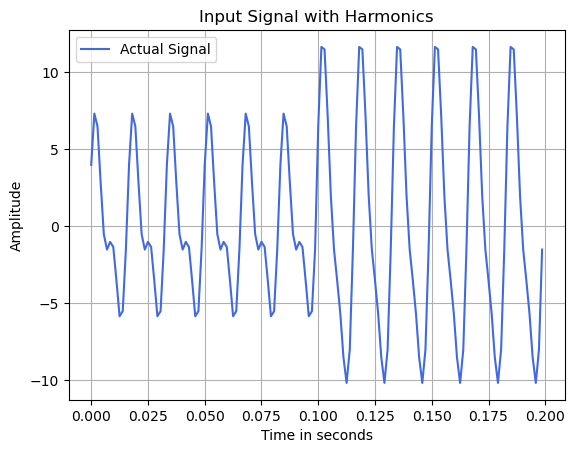

In [8]:
## PLOT
time = np.arange(start_time,end_time,dT)
voltage2 = []

for t in range(0,len(time)):
    
    if time[t] < 0.1:
        v = (A1 * math.sin(2 * np.pi * f * time[t] + np.pi/6)) + (A3 * math.sin(2 * 2 * np.pi * f * time[t] + np.pi/6)) # First signal
    else:
        v = A2 * math.sin(2 * np.pi * f * time[t] + np.pi/6) + (A3 * math.sin(2 * 2 * np.pi * f * time[t] + np.pi/6)) # Second signal
        
    voltage2.append(v)
    
voltage2 = np.array(voltage2)

plt.plot(time,voltage2,mcolors.CSS4_COLORS['royalblue'])
plt.title("Input Signal with Harmonics")
plt.xlabel("Time in seconds")
plt.ylabel("Amplitude")
plt.legend(["Actual Signal"])
plt.grid()
plt.show()

**Applying Fourier algorithm on the input signal (with harmonics):**

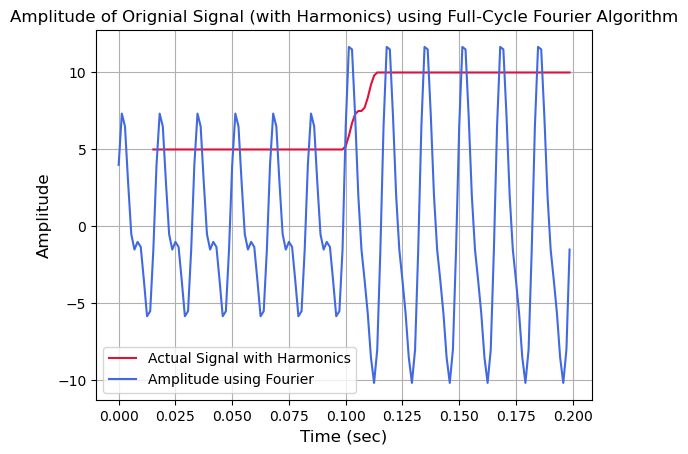

In [9]:
amplitude_fourier2 , angle_fourier2, time_fourier2 = FourierAlgorithm(voltage2,f,N) 

# Plotting
plt.plot(time_fourier2, amplitude_fourier2, mcolors.CSS4_COLORS['crimson'])
plt.plot(time, voltage2, mcolors.CSS4_COLORS['royalblue'])
plt.xlabel('Time (sec)', fontsize=12) 
plt.ylabel('Amplitude', fontsize=12)
plt.legend(["Actual Signal with Harmonics", "Amplitude using Fourier"])
plt.title("Amplitude of Orignial Signal (with Harmonics) using Full-Cycle Fourier Algorithm",fontsize=12)
plt.grid()
plt.show()

**Applying Least Square algorithm on the input signal:**

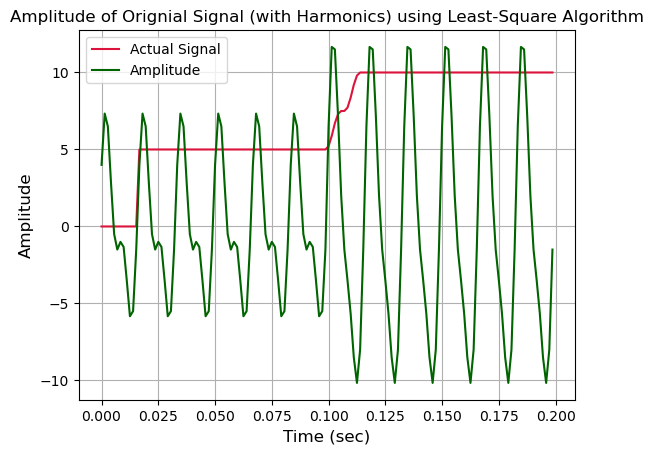

In [10]:
amplitude_leastsquare2 , angle_leastsquare2, time_leastsquare2 = LeastSquareAlgorithm(voltage2,f,N) 

# Plotting
plt.plot(time_leastsquare2, amplitude_leastsquare2, mcolors.CSS4_COLORS['crimson'])
plt.plot(time, voltage2, mcolors.CSS4_COLORS['darkgreen'])
plt.xlabel('Time (sec)', fontsize=12) 
plt.ylabel('Amplitude', fontsize=12)
plt.legend(["Actual Signal", "Amplitude"])
plt.title("Amplitude of Orignial Signal (with Harmonics) using Least-Square Algorithm",fontsize=12)
plt.grid()
plt.show()

<span style="color:#C3260C">
d) Draw frequency response of Cosine filter of Full-cycle Fourier Algorithm with 12 samples per cycle
</span>



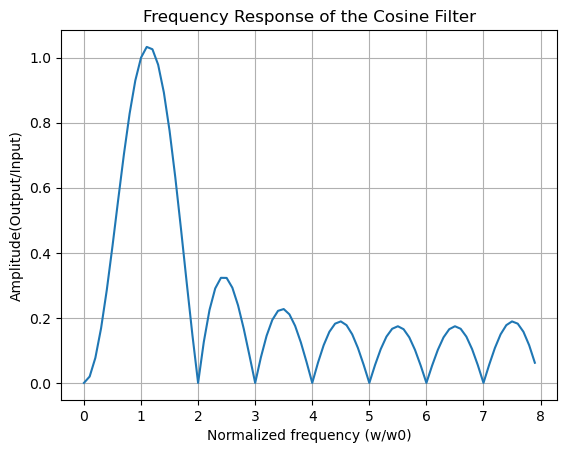

In [11]:
coefficient = np.arange(-(N-1)/2,(N+1)/2) 

w0 = 2 * np.pi * f
y = 2 * np.cos(coefficient * w0 * dT)/N # type of filter function 
w = np.arange(0, 8*w0*dT, 0.1*w0*dT) 

# Z-TRANSFORM COEFFICIENT
j = 0 
Z = np.zeros((w.shape[0],y.shape[0]),dtype=complex) 

for i in w: 
    
    Z[j,:].real = np.cos(coefficient * i)
    Z[j,:].imag = np.sin(coefficient * i) 
    j=j+1

# VALUE OF FILTER TRANSFER FUNCTION 
H = np.matmul(Z,y) 
w_normalized = (w / (w0*dT))

# PLOTTING
plt.plot(w_normalized,np.abs(H)) 
plt.xlabel('Normalized frequency (w/w0)') 
plt.ylabel('Amplitude(Output/Input)') 
plt.title('Frequency Response of the Cosine Filter') 
plt.grid()
plt.show()